In [1]:
import pandas as pd

In [3]:
train_df = pd.read_csv("/content/titanic.csv")

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


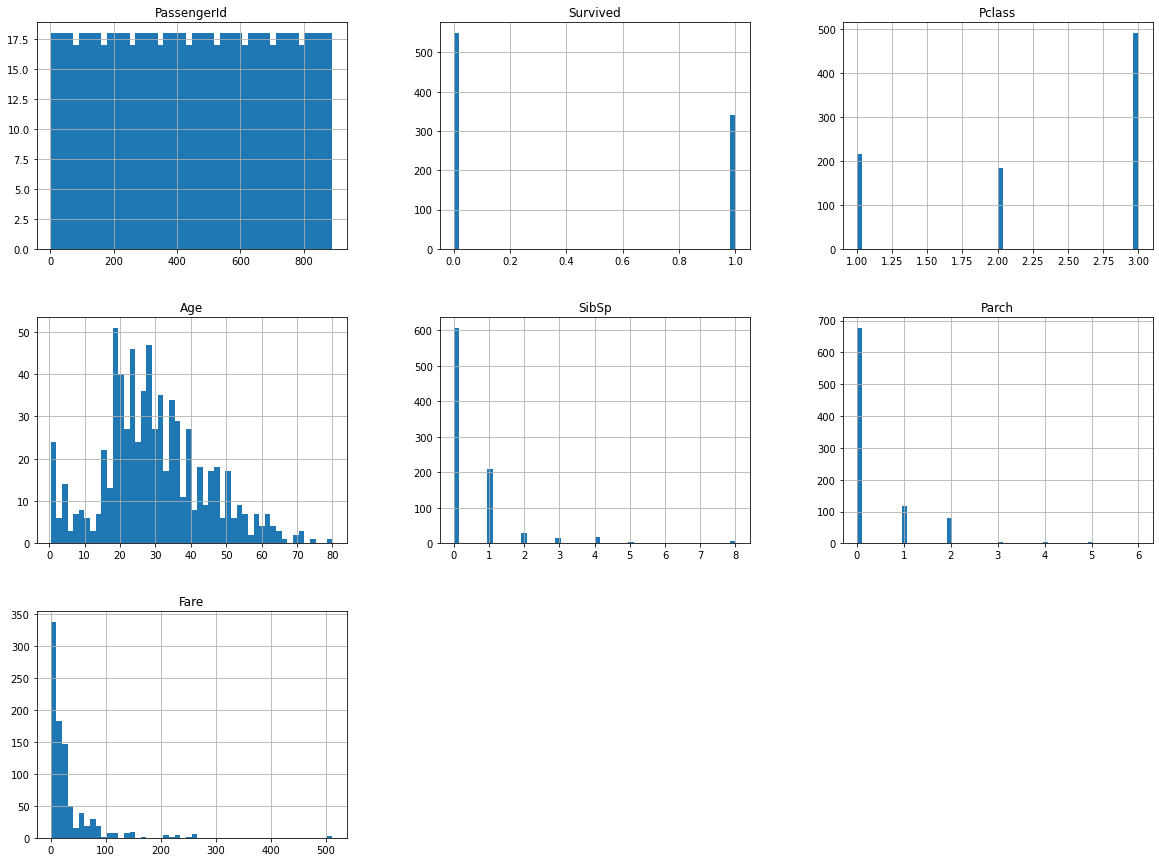

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
train_df.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train_df, test_size=0.2, random_state=42)

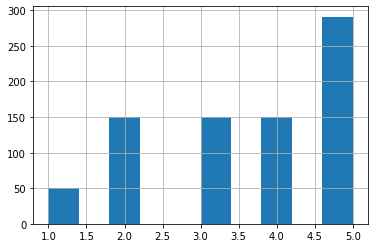

In [10]:
import numpy as np
train_df["new_col"] = pd.cut(train_df["PassengerId"],bins=[100., 150.0, 300.0, 450.0, 600., np.inf],labels=[1, 2, 3, 4, 5])
train_df["new_col"].hist()

In [11]:
# train test split
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = split_train_test(train_df, 0.2)
print(len(train_set),len(test_set))

713 178


In [13]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [14]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [15]:
train_df_with_id = train_df.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(train_df_with_id, 0.2, "index")

In [16]:
train_df_with_id["id"] = train_df["PassengerId"] * 1000 + train_df["PassengerId"]
train_set, test_set = split_train_test_by_id(train_df_with_id, 0.2, "id")

In [17]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train_df, test_size=0.2, random_state=42)

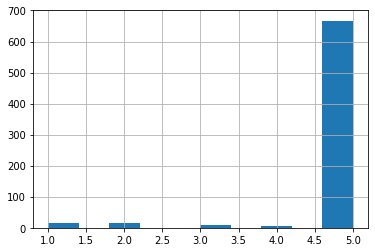

In [18]:
train_df["Age_dist"] = pd.cut(train_df["Age"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])
train_df["Age_dist"].hist()

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(train_df, train_df["Survived"]):
    strat_train_set = train_df.loc[train_index]
    strat_test_set = train_df.loc[test_index]

In [20]:
strat_test_set["Survived"].value_counts() / len(strat_test_set)

0    0.614525
1    0.385475
Name: Survived, dtype: float64

In [21]:
strat_train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,575.000000,712.000000,712.000000,712.000000
mean,444.405899,0.383427,2.308989,29.807687,0.492978,0.390449,31.819826
std,257.465527,0.486563,0.833563,14.485211,1.060720,0.838134,48.059104
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,439.500000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,667.250000,1.000000,3.000000,39.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
strat_test_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,179.000000,179.000000,179.000000,139.000000,179.000000,179.000000,179.000000
mean,452.340782,0.385475,2.307263,29.250000,0.642458,0.346369,33.733145
std,257.532175,0.488073,0.848331,14.740355,1.252228,0.664193,55.843604
min,5.000000,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,241.000000,0.000000,1.500000,19.500000,0.000000,0.000000,7.987500
50%,459.000000,0.000000,3.000000,27.000000,0.000000,0.000000,15.245800
75%,674.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.797900
max,887.000000,1.000000,3.000000,70.000000,8.000000,2.000000,512.329200


In [23]:
def income_cat_proportions(data):
    return data["Survived"].value_counts() / len(data)

train_set, test_set = train_test_split(train_df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(train_df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [24]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
0,0.616162,0.614525,0.586592,-4.798974,-0.265592
1,0.383838,0.385475,0.413408,7.703617,0.426345


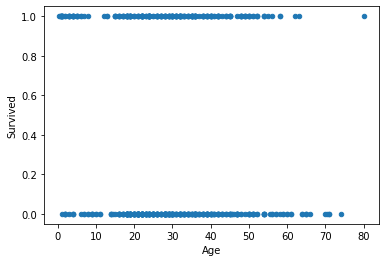

In [25]:
train_df = strat_train_set.copy()
# Visualizing Geographical Data
train_df.plot(kind="scatter", x="Age", y="Survived")

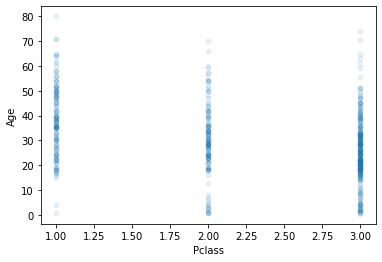

In [26]:
#A better visualization that highlights high-density areas
train_df.plot(kind="scatter", x="Pclass", y="Age", alpha=0.1)

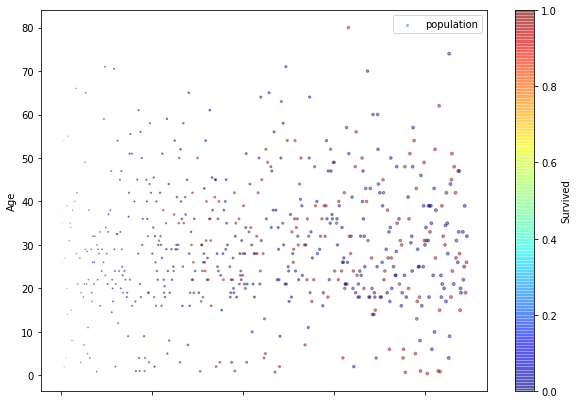

In [27]:
#California housing prices: red is expensive, blue is cheap, larger circles indicate areas with a larger population
train_df.plot(kind="scatter", x="PassengerId", y="Age", alpha=0.4,
s=train_df["PassengerId"]/100, label="population", figsize=(10,7),
c="Survived", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [28]:
#Looking for Correlations
corr_matrix = train_df.corr()
#Now let’s look at how much each attribute correlates with the median house value:
corr_matrix["PassengerId"].sort_values(ascending=False)

PassengerId    1.000000
Age            0.036080
Fare           0.013281
Survived       0.011892
Parch         -0.008022
Pclass        -0.031452
SibSp         -0.042990
Name: PassengerId, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc51f20cc90>,
      dtype=object)

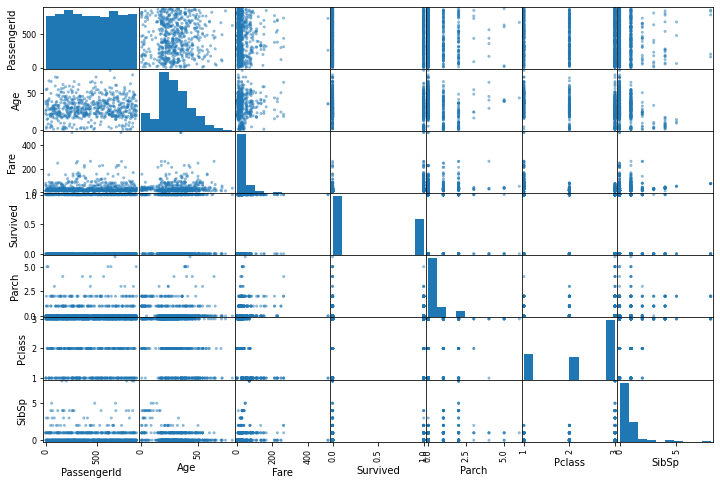

In [29]:
# This scatter matrix plots every numerical attribute against every other numerical attribute, plus a histogram of each numerical attribute
from pandas.plotting import scatter_matrix
attributes = ["PassengerId", "Age", "Fare",
"Survived", "Parch", "Pclass", "SibSp"]
scatter_matrix(train_df[attributes], figsize=(12, 8))

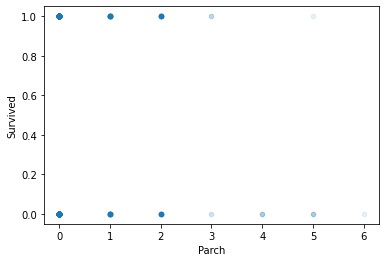

In [30]:
# Median income versus median house value
train_df.plot(kind="scatter", x="Parch", y="Survived",alpha=0.1)

In [31]:
# And now let’s look at the correlation matrix again:
corr_matrix = train_df.corr()
corr_matrix["Age"].sort_values(ascending=False)

Age            1.000000
Fare           0.106915
PassengerId    0.036080
Survived      -0.084268
Parch         -0.175573
SibSp         -0.312885
Pclass        -0.351089
Name: Age, dtype: float64

In [32]:
# Now let's preprocess the categorical input feature, ocean_proximity:
train_cat = train_df[["Sex"]]
train_cat.head(10)

,Sex
692,male
481,male
527,male
855,female
801,female
652,male
509,male
557,male
828,male
18,female


In [33]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
train_cat_encoded = ordinal_encoder.fit_transform(train_cat)
train_cat_encoded[:10]

array([[1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]])

In [34]:
ordinal_encoder.categories_

[array(['female', 'male'], dtype=object)]

In [35]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
train_cat_1hot = cat_encoder.fit_transform(train_cat)
train_cat_1hot

<712x2 sparse matrix of type '<class 'numpy.float64'>'
	with 712 stored elements in Compressed Sparse Row format>

In [36]:
# By default, the OneHotEncoder class returns a sparse array, but we can convert it to a dense array if needed by calling the toarray() method:
train_cat_1hot.toarray()

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [37]:
# Alternatively, you can set sparse=False when creating the OneHotEncoder:
cat_encoder = OneHotEncoder(sparse=False)
train_cat_1hot = cat_encoder.fit_transform(train_cat)
train_cat_1hot

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [38]:
cat_encoder.categories_

[array(['female', 'male'], dtype=object)]

In [46]:
# Let's create a custom transformer to add extra attributes:

from sklearn.base import BaseEstimator, TransformerMixin

# column index
Age_ix, Fare_ix, Parch_ix, SibSp_ix = 6, 4, 5, 1

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_I_dont_know=True): # no *args or **kargs
        self.add_I_dont_know = add_I_dont_know
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        survives_per_age = X[:, Age_ix] * X[:, SibSp_ix]
        population_per_parch = X[:, Parch_ix] * X[:, SibSp_ix]
        if self.add_I_dont_know:
            Fare_per_age = X[:, Fare_ix] * X[:, Age_ix]
            return np.c_[X, survives_per_age, population_per_parch,
                         Fare_per_age]
        else:
            return np.c_[X, survives_per_age, population_per_parch]

attr_adder = CombinedAttributesAdder(add_I_dont_know=False)
titanic_extra_attribs = attr_adder.transform(train_df.values)

In [47]:
# Note that I hard coded the indices (3, 4, 5, 6) for concision and clarity in the book, but it would be much cleaner to get them dynamically, like this:
col_names = "Age", "Fare", "Parch", "SibSp"
Age_ix, Fare_ix, Parch_ix, SibSp_ix = [train_df.columns.get_loc(c) for c in col_names] # get the column indices

In [48]:
# Also, housing_extra_attribs is a NumPy array, we've lost the column names (unfortunately, that's a problem with Scikit-Learn). To recover a DataFrame, you could run this
titanic_extra_attribs = pd.DataFrame(
    titanic_extra_attribs,
    columns=list(train_df.columns)+["survives_per_age", "Fare_per_age"],
    index=train_df.index)
titanic_extra_attribs.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_col,Age_dist,survives_per_age,Fare_per_age
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,5.0,NaN,0,NaN
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,4.0,NaN,0,NaN
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,4.0,NaN,0,NaN
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.35,NaN,S,5.0,5.0,0,18.0
801,802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.25,NaN,S,5.0,5.0,1,31.0


In [56]:
# take care of missing values:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
#Since the median can only be computed on numerical attributes, you need to create a copy of the data without the text attribute ocean_proximity:
titanic_num = train_df.drop(["Name", "Sex", "Ticket", "Cabin", "Embarked"],axis=1)
#Now you can fit the imputer instance to the training data using the fit() method:
imputer.fit(titanic_num)
imputer.statistics_
titanic_num.median().values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == '__main__':


array([439.5   ,   0.    ,   3.    ,  28.5   ,   0.    ,   0.    ,
        14.4542])

In [57]:
X = imputer.transform(titanic_num)
titanic_tr = pd.DataFrame(X, columns=titanic_num.columns,index=titanic_num.index)

In [59]:
titanic_tr.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,new_col,Age_dist
692,693.0,1.0,3.0,28.5,0.0,0.0,56.4958,5.0,5.0
481,482.0,0.0,2.0,28.5,0.0,0.0,0.0000,4.0,5.0
527,528.0,0.0,1.0,28.5,0.0,0.0,221.7792,4.0,5.0
855,856.0,1.0,3.0,18.0,0.0,1.0,9.3500,5.0,5.0
801,802.0,1.0,2.0,31.0,1.0,1.0,26.2500,5.0,5.0


In [61]:
# Now let's build a pipeline for preprocessing the numerical attributes:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

titanic_num_tr = num_pipeline.fit_transform(titanic_num)

In [62]:
titanic_num_tr

array([[ 0.96622201,  1.26809251,  0.82956755, ...,  0.5138115 ,
         1.07926312,  0.22613573],
       [ 0.1461187 , -0.788586  , -0.37094484, ..., -0.66256323,
         0.28706174,  0.22613573],
       [ 0.324909  , -0.788586  , -1.57145722, ...,  3.95539858,
         0.28706174,  0.22613573],
       ...,
       [ 1.13723882, -0.788586  ,  0.82956755, ...,  0.0532047 ,
         1.07926312,  0.22613573],
       [ 0.07227054, -0.788586  , -1.57145722, ...,  0.13909685,
         0.28706174,  0.22613573],
       [ 0.24717409,  1.26809251, -1.57145722, ..., -0.10973011,
         0.28706174,  0.22613573]])

In [64]:
from sklearn.compose import ColumnTransformer

num_attribs = list(titanic_num)
cat_attribs = ["Survived"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

titanic_prepared = full_pipeline.fit_transform(train_df)

In [65]:
titanic_prepared

array([[ 0.96622201,  1.26809251,  0.82956755, ...,  0.22613573,
         0.        ,  1.        ],
       [ 0.1461187 , -0.788586  , -0.37094484, ...,  0.22613573,
         1.        ,  0.        ],
       [ 0.324909  , -0.788586  , -1.57145722, ...,  0.22613573,
         1.        ,  0.        ],
       ...,
       [ 1.13723882, -0.788586  ,  0.82956755, ...,  0.22613573,
         1.        ,  0.        ],
       [ 0.07227054, -0.788586  , -1.57145722, ...,  0.22613573,
         1.        ,  0.        ],
       [ 0.24717409,  1.26809251, -1.57145722, ...,  0.22613573,
         0.        ,  1.        ]])

In [66]:
titanic_prepared.shape

(712, 11)

In [67]:
# For reference, here is the old solution based on a DataFrameSelector transformer (to just select a subset of the Pandas DataFrame columns), and a FeatureUnion:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [68]:
# Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features:
num_attribs = list(titanic_num)
cat_attribs = ["Survived"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [69]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [70]:
old_titanic_prepared = old_full_pipeline.fit_transform(train_df)
old_titanic_prepared

array([[ 0.96622201,  1.26809251,  0.82956755, ...,  0.22613573,
         0.        ,  1.        ],
       [ 0.1461187 , -0.788586  , -0.37094484, ...,  0.22613573,
         1.        ,  0.        ],
       [ 0.324909  , -0.788586  , -1.57145722, ...,  0.22613573,
         1.        ,  0.        ],
       ...,
       [ 1.13723882, -0.788586  ,  0.82956755, ...,  0.22613573,
         1.        ,  0.        ],
       [ 0.07227054, -0.788586  , -1.57145722, ...,  0.22613573,
         1.        ,  0.        ],
       [ 0.24717409,  1.26809251, -1.57145722, ...,  0.22613573,
         0.        ,  1.        ]])

In [72]:
# The result is the same as with the ColumnTransformer:
np.allclose(titanic_prepared, old_titanic_prepared)

True

In [74]:
from sklearn.linear_model import LinearRegression
titanic_labels=train_df["Survived"]
lin_reg = LinearRegression()
lin_reg.fit(titanic_prepared,titanic_labels)

LinearRegression()

In [75]:
# let's try the full preprocessing pipeline on a few training instances
some_data = train_df.iloc[:5]
some_labels = titanic_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 1.00000000e+00 -5.55111512e-17  1.66533454e-16  1.00000000e+00
  1.00000000e+00]


In [76]:
# Compare against the actual values:
print("Labels:", list(some_labels))

Labels: [1, 0, 0, 1, 1]


In [77]:
some_data_prepared

array([[ 0.96622201,  1.26809251,  0.82956755, -0.08113533, -0.46508428,
        -0.46618317,  0.5138115 ,  1.07926312,  0.22613573,  0.        ,
         1.        ],
       [ 0.1461187 , -0.788586  , -0.37094484, -0.08113533, -0.46508428,
        -0.46618317, -0.66256323,  0.28706174,  0.22613573,  1.        ,
         0.        ],
       [ 0.324909  , -0.788586  , -1.57145722, -0.08113533, -0.46508428,
        -0.46618317,  3.95539858,  0.28706174,  0.22613573,  1.        ,
         0.        ],
       [ 1.59976154,  1.26809251,  0.82956755, -0.88782719, -0.46508428,
         0.72778236, -0.46787435,  1.07926312,  0.22613573,  0.        ,
         1.        ],
       [ 1.38987728,  1.26809251, -0.37094484,  0.11093416,  0.47833454,
         0.72778236, -0.11597681,  1.07926312,  0.22613573,  0.        ,
         1.        ]])

In [78]:
from sklearn.metrics import mean_squared_error

titanic_predictions = lin_reg.predict(titanic_prepared)
lin_mse = mean_squared_error(titanic_labels, titanic_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.0950868956248997e-16

In [79]:
# Note: since Scikit-Learn 0.22, you can get the RMSE directly by calling the mean_squared_error() function with squared=False.
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(titanic_labels, titanic_predictions)
lin_mae

1.348796230759495e-16

In [80]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(titanic_prepared, titanic_labels)

DecisionTreeRegressor(random_state=42)

In [81]:
titanic_predictions = tree_reg.predict(titanic_prepared)
tree_mse = mean_squared_error(titanic_labels, titanic_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [82]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, titanic_prepared, titanic_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [83]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mean: 0.0
Standard deviation: 0.0


In [87]:
# Note: we specify n_estimators=100 to be future-proof since the default value is going to change to 100 in Scikit-Learn 0.22 (for simplicity, this is not shown in the book).

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(titanic_prepared, titanic_labels)

RandomForestRegressor(random_state=42)

In [88]:
housing_predictions = forest_reg.predict(titanic_prepared)
forest_mse = mean_squared_error(titanic_labels, titanic_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.0

In [89]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, titanic_prepared, titanic_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mean: 0.0
Standard deviation: 0.0


In [90]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(titanic_prepared, titanic_labels)
housing_predictions = svm_reg.predict(titanic_prepared)
svm_mse = mean_squared_error(titanic_labels, titanic_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.0

In [91]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(titanic_prepared, titanic_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [92]:
# The best hyperparameter combination found:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 3}

In [93]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=3, random_state=42)

In [94]:
# Let's look at the score of each hyperparameter combination tested during the grid search:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.01769149641447584 {'max_features': 2, 'n_estimators': 3}
0.015903778432282252 {'max_features': 2, 'n_estimators': 10}
0.019791586208907842 {'max_features': 2, 'n_estimators': 30}
-0.0 {'max_features': 4, 'n_estimators': 3}
0.006477502756312958 {'max_features': 4, 'n_estimators': 10}
0.0044946657497549475 {'max_features': 4, 'n_estimators': 30}
-0.0 {'max_features': 6, 'n_estimators': 3}
-0.0 {'max_features': 6, 'n_estimators': 10}
-0.0 {'max_features': 6, 'n_estimators': 30}
-0.0 {'max_features': 8, 'n_estimators': 3}
-0.0 {'max_features': 8, 'n_estimators': 10}
-0.0 {'max_features': 8, 'n_estimators': 30}
-0.0 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.015451445509227708 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
-0.0 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.003739787960033829 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
-0.0 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
0.003739787960033829 {'bootstr

In [95]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009797,0.000565,0.002387,0.000616,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-0.000000,-0.000000,...,-0.000313,0.000626,17,-0.000000,-0.000195,-0.000000,-0.000585,-0.000000,-0.000156,0.000227
1,0.029191,0.000860,0.003943,0.000370,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-0.000210,-0.000210,...,-0.000253,0.000123,16,-0.000053,-0.000123,-0.000088,-0.000193,-0.000211,-0.000133,0.000060
2,0.085723,0.004450,0.010468,0.001271,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-0.000342,-0.000435,...,-0.000392,0.000147,18,-0.000078,-0.000156,-0.000172,-0.000076,-0.000101,-0.000117,0.000040
3,0.009981,0.000372,0.002104,0.000131,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-0.000000,-0.000000,...,0.000000,0.000000,1,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
4,0.029534,0.001529,0.006723,0.003182,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-0.000070,-0.000140,...,-0.000042,0.000056,14,-0.000035,-0.000018,-0.000000,-0.000018,-0.000000,-0.000014,0.000013
5,0.085659,0.003854,0.010376,0.001154,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-0.000016,-0.000085,...,-0.000020,0.000033,13,-0.000010,-0.000008,-0.000008,-0.000004,-0.000002,-0.000006,0.000003
6,0.010156,0.000362,0.004034,0.003744,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-0.000000,-0.000000,...,0.000000,0.000000,1,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
7,0.029040,0.000208,0.004212,0.000109,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-0.000000,-0.000000,...,0.000000,0.000000,1,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
8,0.087866,0.008458,0.009541,0.000651,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-0.000000,-0.000000,...,0.000000,0.000000,1,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
9,0.010521,0.000619,0.002136,0.000186,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-0.000000,-0.000000,...,0.000000,0.000000,1,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000


In [96]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(titanic_prepared, titanic_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc517ba1b10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc517ba1550>},
                   random_state=42, scoring='neg_mean_squared_error')

In [97]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

-0.0 {'max_features': 7, 'n_estimators': 180}
-0.0 {'max_features': 5, 'n_estimators': 15}
0.003993748024813783 {'max_features': 3, 'n_estimators': 72}
0.0030845251220537923 {'max_features': 5, 'n_estimators': 21}
-0.0 {'max_features': 7, 'n_estimators': 122}
0.003833998103821234 {'max_features': 3, 'n_estimators': 75}
0.003267612020302189 {'max_features': 3, 'n_estimators': 88}
0.0008374189873805652 {'max_features': 5, 'n_estimators': 100}
0.002642193752596178 {'max_features': 3, 'n_estimators': 150}
-0.0 {'max_features': 5, 'n_estimators': 2}


In [98]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [99]:
from sklearn.linear_model import LogisticRegression
titanic_labels=train_df["Survived"]
lin_reg = LogisticRegression()
lin_reg.fit(titanic_prepared,titanic_labels)

LogisticRegression()

In [100]:
from sklearn.metrics import mean_squared_error

titanic_predictions = lin_reg.predict(titanic_prepared)
lin_mse = mean_squared_error(titanic_labels, titanic_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0

In [101]:
some_data = train_df.iloc[:5]
some_labels = titanic_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [1 0 0 1 1]


In [102]:
# Compare against the actual values:
print("Labels:", list(some_labels))

Labels: [1, 0, 0, 1, 1]
